# Milestone 1

# Introduction

**Nama      : Titian Fitriana Prasasti**

***Batch    : 001 HCK***

**Dataset   :** `Telco Customer Churn` dari kaggle.com

### Assignment Objectives

Milestones 1 ini dibuat guna mengevaluasi Pembelajaran Phase 2 :

- Mampu memahami konsep Artificial Neural Network.
- Mampu mempersiapkan data untuk digunakan dalam model Artificial Neural Network.
- Mampu mengimplementasikan Artificial Neural Network dengan data yang diberikan.
- Mampu menganalisis dan menjelaskan layer yang dibuat.

### Data Dictionary

|Variable|Type|Description|Values|
|:-------|:------|:----------|:------|
|customerID|Object|A unique ID that identifies each customer|Unique|
|gender|Categorical|The customer’s gender|Male, Female|
|SeniorCitizen|Boolean|Indicates if the customer is 65 or older|1 : Yes, 0 : No|
|Partner|Categorical|Indicates if the customer has partner or not|Yes, No|
|Dependents|Categorical|Indicates if the customer lives with any dependents|Yes, No|
|tenure|Integer|Indicates the total amount of months that the customer has been with the company|Months|
|PhoneService|Categorical|Indicates if the customer subscribes to home phone service with the company|Yes, No|
|MultipleLines|Categorical|Indicates if the customer subscribes to multiple telephone lines with the company|Yes, No, No phone service|
|InternetService|Categorical|Indicates if the customer subscribes to Internet service with the company|DSL, Fiber optic, No|
|OnlineSecurity|Categorical|Indicates if the customer subscribes to an additional online security service provided by the company|Yes, No, No internet service|
|OnlineBackup|Categorical|Indicates if the customer subscribes to an additional online backup service provided by the company|Yes, No, No internet service|
|DeviceProtection|Categorical|Indicates if the customer subscribes to an additional device protection plan for their Internet equipment|Yes, No, No internet service|
|TechSupport|Categorical|Indicates if the customer subscribes to an additional technical support plan|Yes, No, No internet service|
|StreamingTV|Categorical|Indicates if the customer uses their Internet service to stream television programing from a third party provider|Yes, No, No internet service|
|StreamingMovies|Categorical|Indicates if the customer uses their Internet service to stream movies from a third party provider|Yes, No, No internet service|
|Contract|Categorical|Indicates the customer’s current contract type|Month-to-month, One year, Two year|
|PaperlessBilling|Categorical|Indicates if the customer has chosen paperless billing|Yes, No|
|PaymentMethod|Categorical|Indicates how the customer pays their bill|Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic)|
|MonthlyCharges|Float|Indicates the customer’s current total monthly charge for all their services from the company|USD|
|TotalCharges|Float|Indicates the customer’s total charges|USD|
|Churn|Categorical|Indicates the status of the customer at the end of the quarter|Yes, No|


# Import Library

In [200]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt 

import tensorflow as tf
from tensorflow.keras.models import Sequential, Model, load_model
from tensorflow.keras.layers import Input, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, roc_curve, roc_auc_score, accuracy_score, ConfusionMatrixDisplay, confusion_matrix
from sklearn.preprocessing import StandardScaler 
from feature_engine.outliers import Winsorizer
from sklearn.preprocessing import OneHotEncoder
from imblearn.over_sampling import SMOTENC
from collections import Counter
import scipy.stats as stats
import phik
import pickle

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
np.random.seed(20)
tf.random.set_seed(20)

# Data Loading

In [214]:
data.seniorcitizen.value_counts()

No     5869
Yes    1141
Name: seniorcitizen, dtype: int64

In [5]:
# Read Data-Set
data = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

# Convert columns name to lower font
data.columns = map(str.lower, data.columns)

# Set maximal columns
pd.set_option('display.max_columns', None)

In [6]:
data

,customerid,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [7]:
data.head()

,customerid,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [8]:
data.tail()

,customerid,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes
7042,3186-AJIEK,Male,0,No,No,66,Yes,No,Fiber optic,Yes,No,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.5,No


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerid        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   seniorcitizen     7043 non-null   int64  
 3   partner           7043 non-null   object 
 4   dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   phoneservice      7043 non-null   object 
 7   multiplelines     7043 non-null   object 
 8   internetservice   7043 non-null   object 
 9   onlinesecurity    7043 non-null   object 
 10  onlinebackup      7043 non-null   object 
 11  deviceprotection  7043 non-null   object 
 12  techsupport       7043 non-null   object 
 13  streamingtv       7043 non-null   object 
 14  streamingmovies   7043 non-null   object 
 15  contract          7043 non-null   object 
 16  paperlessbilling  7043 non-null   object 


monthly charge harusnya float dan drop customer id

In [10]:
data['totalcharges'] = pd.to_numeric(data['totalcharges'], errors = 'coerce')

In [11]:
data['seniorcitizen'] = data['seniorcitizen'].replace([0,1],['No','Yes'])

In [12]:
data.isnull().sum()

customerid           0
gender               0
seniorcitizen        0
partner              0
dependents           0
tenure               0
phoneservice         0
multiplelines        0
internetservice      0
onlinesecurity       0
onlinebackup         0
deviceprotection     0
techsupport          0
streamingtv          0
streamingmovies      0
contract             0
paperlessbilling     0
paymentmethod        0
monthlycharges       0
totalcharges        11
churn                0
dtype: int64

In [13]:
# dropping missing values from the dataset
data.dropna(inplace=True)

In [14]:
# drop customerid
data = data.drop(columns='customerid', axis=1)

In [15]:
data.duplicated().sum()

22

In [16]:
data.drop_duplicates(inplace=True)

In [17]:
data.shape

(7010, 20)

# Exploratory Data Analysis (EDA)

[Text(0, 0, '5153'), Text(0, 0, '1857')]

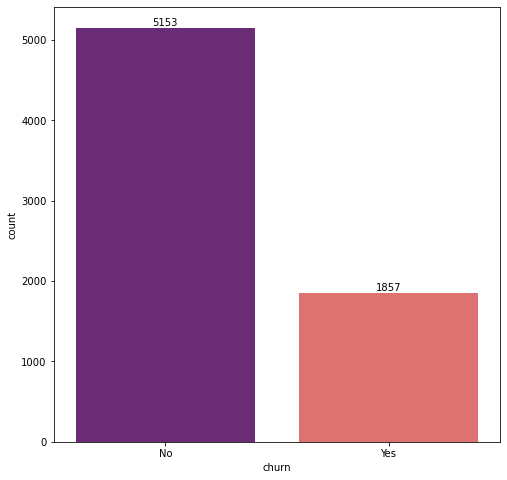

In [18]:
# Melihat jumlah data target

plt.figure(figsize=(8,8))
cp = sns.countplot(data=data, x='churn', palette='magma')
cp.bar_label(cp.containers[0], label_type='edge')

Dari visualisasi tersebut terlihat bahwa data target imbalance dengan proporsi label `No` sebanyak **73.5%** dan label `Yes` sebanyak **26.5%**. Data imbalance akan di handling lebih lanjut dengan metode SMOTENC pada bagian data preprocessing.

### Numeric Data Distribution

In [19]:
data.describe()

,tenure,monthlycharges,totalcharges
count,7010.000000,7010.000000,7010.000000
mean,32.520399,64.888666,2290.353388
std,24.520441,30.064769,2266.820832
min,1.000000,18.250000,18.800000
25%,9.000000,35.750000,408.312500
50%,29.000000,70.400000,1403.875000
75%,56.000000,89.900000,3807.837500
max,72.000000,118.750000,8684.800000


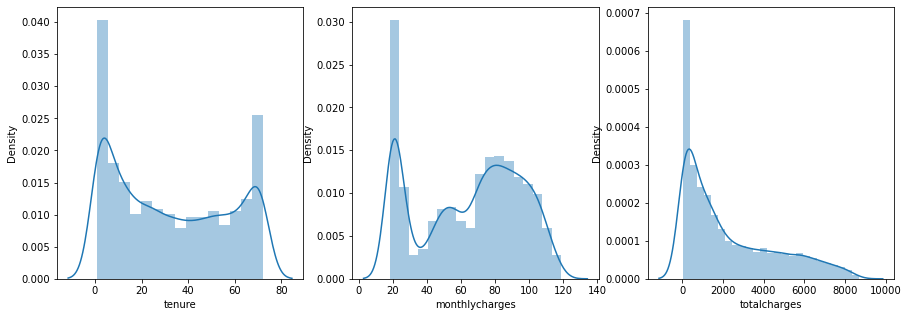

In [20]:
import warnings
warnings.filterwarnings("ignore")

cols_dis = ['tenure','monthlycharges','totalcharges']
fig, ax = plt.subplots(ncols=3,figsize=(15,5))
x=0

for j in range(3):
  try:
    sns.distplot(data[cols_dis[x]],ax=ax[j])
    x+=1
  except:
    pass
plt.show()

In [21]:
data[cols_dis].skew()

tenure            0.233740
monthlycharges   -0.225686
totalcharges      0.958322
dtype: float64

Terlihat dari grafik distribusi dan perhitungan skewness dari ketiga kolom nunmerik pada daset menunjukan bahwa kolom `tenure` dan `monthlycharges` memiliki distribusi yang dapat dikatakan normal walau pada visualisasinya terdapat lebih dari satu puncak data. Kemudian untuk kolom `totalcharges` distribusinya moderately skew. Lebih lanjutnya akan kita lihat korelasinya dengan kolom target.

### Category Data Proportion

In [22]:
data.keys()

Index(['gender', 'seniorcitizen', 'partner', 'dependents', 'tenure',
       'phoneservice', 'multiplelines', 'internetservice', 'onlinesecurity',
       'onlinebackup', 'deviceprotection', 'techsupport', 'streamingtv',
       'streamingmovies', 'contract', 'paperlessbilling', 'paymentmethod',
       'monthlycharges', 'totalcharges', 'churn'],
      dtype='object')

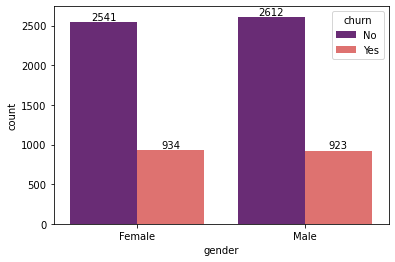

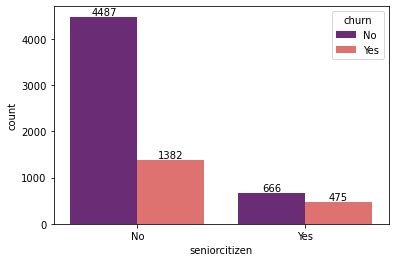

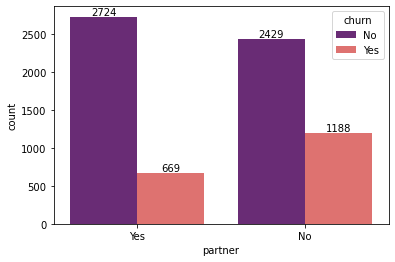

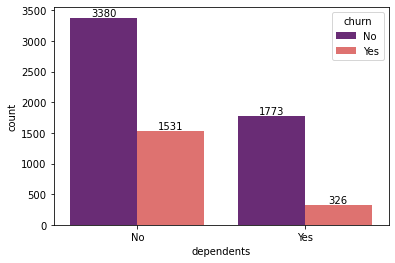

In [23]:
for cat in ['gender', 'seniorcitizen', 'partner', 'dependents']:
    cp = sns.countplot(x=cat,data=data,hue='churn',palette='magma')
    for container in cp.containers:
        cp.bar_label(container)
    plt.show()

- Kolom `gender` :
Pada kolom ini tidak terlihat adanya perbedaan proporsi label terhadap kolom target.
- Kolom `seniorcitizen`:
Jika dilihat dari jumlah data, customer yang bukan senior cetizen pada kolom ini memiliki jumlah churn tiga kali lipat lebih banyak daripada customer senior citizen. Namun jika ditinjau dari proporsi customer seniorcitizen, proporsinya lebih besar karena jumlah customer yg churn pada label ini nilainya lebih dekat dengan customer yang tidak churn.
- Kolom `partner`:
Pada kolom ini terlihat customer yang tidak memiliki pasangan memiliki jumlah dan proporsi yang lebih banyak.
- Kolom `dependents`: 
Dependents diartikan sebagai customer yang membayar tagihannya sendiri sedangkan yang tidak dependent adalah customer yang pembayarannya ditanggung atau disupport oleh orang lain. Pada kolom ini jumlah dan proporsi customer yang churn lebih banyak pada label No. Artinya customer yang pembayarannya ditanggung oleh orang lain memiliki kecenderungan untuk churn.

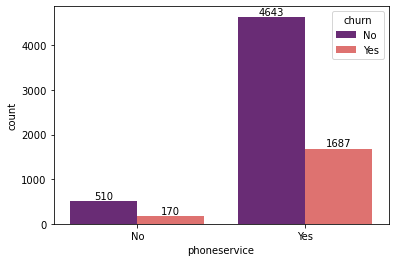

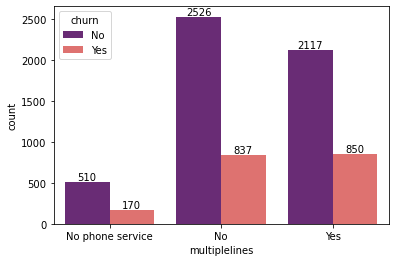

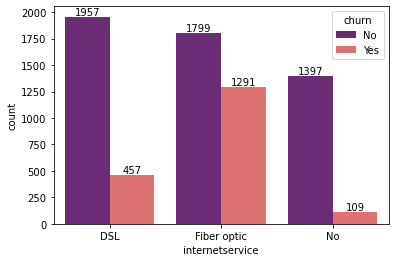

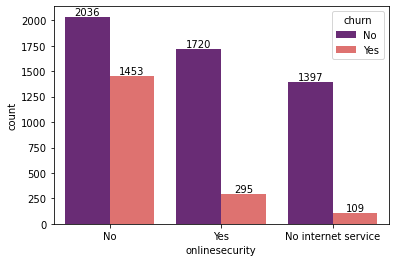

In [24]:
for cat in ['phoneservice', 'multiplelines', 'internetservice','onlinesecurity']:
    cp = sns.countplot(x=cat,data=data,hue='churn',palette='magma')
    for container in cp.containers:
        cp.bar_label(container)
    plt.show()

- Kolom `phoneservice` :
Pada kolom ini, customer yang memakai phone service memiliki jumlah churn yang lebih banyak.
- Kolom `multiplelines`:
Pada kolom ini kategori 'yes' dan 'no` memiliki proporsi yang hampir sama dan jumlahnya lebih banyak daripada label 'no phone service'
- Kolom `internetservice`:
Pada kolom ini terlihat customer dengan jenis internet fiber optic memiliki tingkat churn yang sangat tinggi.
- Kolom `onlinesecurity`: 
Pada kolom ini terlihat customer yang tidak memakai service online secuirty memiliki tingkat churn yang sangat tinggi.

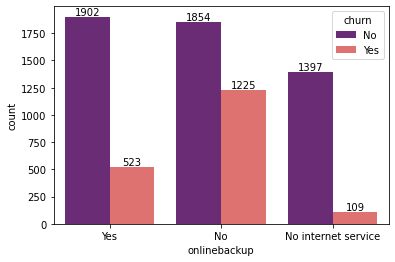

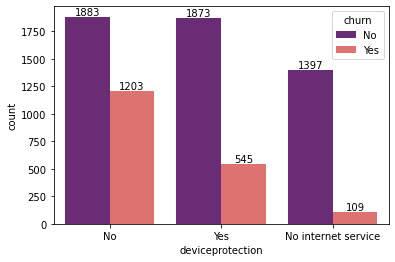

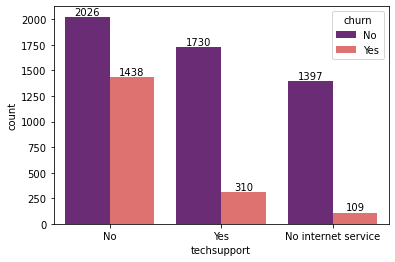

In [25]:
for cat in ['onlinebackup', 'deviceprotection', 'techsupport']:
    cp = sns.countplot(x=cat,data=data,hue='churn',palette='magma')
    for container in cp.containers:
        cp.bar_label(container)
    plt.show()

- Kolom `onlinebackup`: 
Pada kolom ini terlihat customer yang tidak memakai service online backup memiliki tingkat churn yang paling tinggi.
- Kolom `deviceprotection`: 
Pada kolom ini terlihat customer yang tidak memakai service device protection memiliki tingkat churn yang sangat tinggi.
- Kolom `techsupport`: 
Pada kolom ini terlihat customer yang tidak memakai service tech support memiliki tingkat churn yang sangat tinggi.

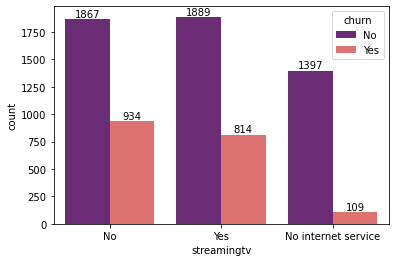

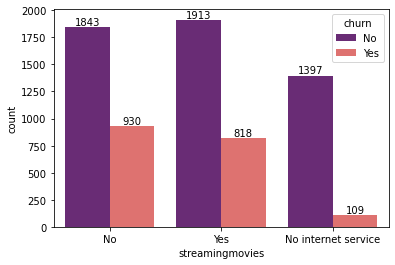

In [26]:
for cat in ['streamingtv', 'streamingmovies']:
    cp = sns.countplot(x=cat,data=data,hue='churn',palette='magma')
    for container in cp.containers:
        cp.bar_label(container)
    plt.show()

Kolom `streamingtv` dan `streamingmovies` memiliki proporsi yang hampir sama tiap labelnya hal ini menunjukan tidak adanya pola tertentu pada kedua kolom ini.

Note : hal yg menarik adalah pada 7 kolom terakhir terkait service yaitu 'internetservice', 'onlinesecurity',
       'onlinebackup', 'deviceprotection', 'techsupport', 'streamingtv', dan 'streamingmovies' memiliki satu label yang sama yaitu no internet service yang mana memang pada ke 7 jenis service tersebut dibutuhkan internet. Label ini memiliki jumlah customer yang konsisten. Artinya customer yang tidak memiliki internet service otomatis tidak akan menggunakan ketujuh service tersebut dan jumlah customer tersebut hanya menggunakan phone service saja.

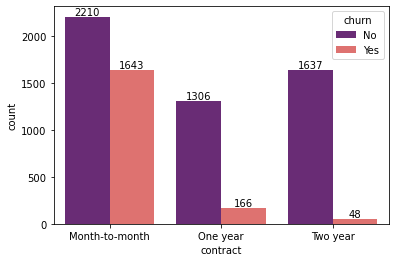

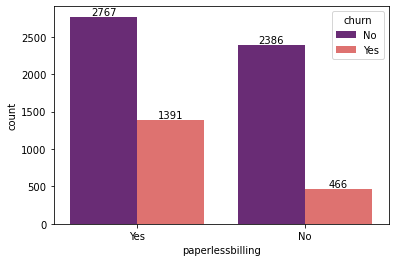

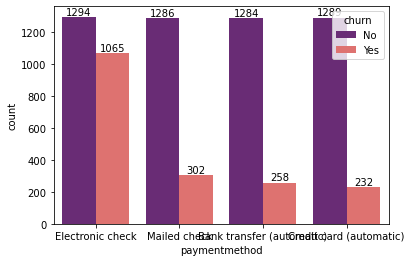

In [27]:
for cat in ['contract', 'paperlessbilling', 'paymentmethod']:
    cp = sns.countplot(x=cat,data=data,hue='churn',palette='magma')
    for container in cp.containers:
        cp.bar_label(container)
    plt.show()

In [28]:
data[(data['paymentmethod'] == 'Electronic check') &
     (data['contract'] == 'Month-to-month')]


,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
0,Female,No,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
4,Female,No,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,Female,No,No,No,8,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.50,Yes
8,Female,No,Yes,No,28,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
14,Male,No,No,No,25,Yes,No,Fiber optic,Yes,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,105.50,2686.05,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7020,Male,No,Yes,Yes,12,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Electronic check,19.20,239.00,No
7023,Female,Yes,Yes,No,63,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,103.50,6479.40,No
7029,Female,Yes,No,No,6,No,No phone service,DSL,No,No,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,44.40,263.05,No
7032,Male,Yes,No,No,1,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,75.75,75.75,Yes


- Kolom `contract`: 
Pada kolom ini terlihat customer menggunakan pembayaran bulanan memiliki tingkat churn yang paling tinggi.
- Kolom `paperlessbilling`: 
Pada kolom ini terlihat customer yang menggunakan paperless billing memiliki tingkat churn yang tinggi.
- Kolom `paymentmethod`: 
Pada kolom ini customer yang menggunakan eCheck memiliki tingkat churn yang sangat tinggi. 

Note: pada kolom `paymentmethod` setelah ditinjau kembali dari dataset di atas terlihat bahwa mayoritas customer dengan pembayaran bulanan menggunakan metode pembayaran eCheck. Penulis memprediksi bahwa hal ini akan berakibat kolom ini memiliki korelasi dengan kolom target. Jika demikian, penulis akan mempertimbangkan untuk drop kolom ini karena jumlah ketiga label lainnya tidak berbeda secara signifikan sedangkan label eCheck tinggi karena memiliki hubungan dengan kolom `contract`.

# Data Preprocessing

In [29]:
data['churn'] = data['churn'].replace(['No','Yes'],[0,1])

In [30]:
data_inf = data.sample(5, random_state=49)
data_inf

,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
2542,Male,No,No,Yes,35,Yes,No,DSL,No,No,No,Yes,Yes,Yes,One year,Yes,Mailed check,72.10,2495.15,0
4225,Male,No,Yes,No,8,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,20.25,158.35,0
1997,Female,No,Yes,Yes,67,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6717.90,0
6285,Male,No,No,No,26,No,No phone service,DSL,Yes,No,No,Yes,Yes,Yes,One year,No,Credit card (automatic),54.55,1362.85,0
6240,Male,No,No,Yes,1,Yes,Yes,Fiber optic,No,No,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,93.30,93.30,1


## Split Train, Validation, & Test

In [31]:
X_train, X_test, y_train, y_test = train_test_split(data.drop(columns='churn'), data['churn'], train_size=0.9, stratify=data['churn'])
X_train, X_val, y_train, y_val = train_test_split(X_train,y_train, train_size=0.8, stratify=y_train)

In [32]:
# Reset the index
X_train.reset_index(drop = True, inplace = True)
X_test.reset_index(drop = True, inplace = True)
X_val.reset_index(drop = True, inplace = True)
y_train.reset_index(drop = True, inplace = True)
y_test.reset_index(drop = True, inplace = True)
y_val.reset_index(drop = True, inplace = True)

In [33]:
X_train.shape

(5047, 19)

## Feature Selection

In [34]:
data.corr().nlargest(19, 'churn')['churn']


churn             1.000000
monthlycharges    0.194008
totalcharges     -0.198362
tenure           -0.353339
Name: churn, dtype: float64

Terlihat ketiga kolom numerik tersebut memiliki korelasi dengan kolom target (walau terbilang rendah) dengan kolom `tenure` sebagai kolom yang  memiliki korelasi tertinggi dengan skor -0.3. Dari skor korelasi tersebut penulis mempertimbangkan ketiga kolom tersebut untuk menjadi feature. Namun hal ini akan kita tinjau kembali dengan phik matrix.

## Categorical Data Correlation (Hyphotesis Testing)

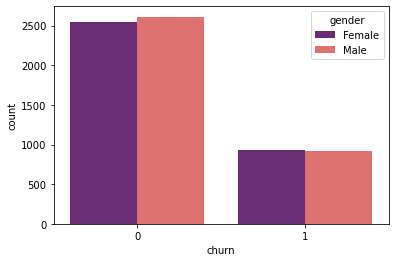

churn      0    1
gender           
Female  2541  934
Male    2612  923
p=0.483376202346
Probably independent


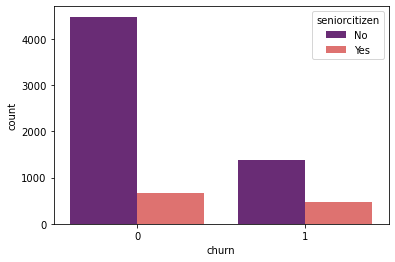

churn             0     1
seniorcitizen            
No             4487  1382
Yes             666   475
p=0.000000000000
Probably dependent


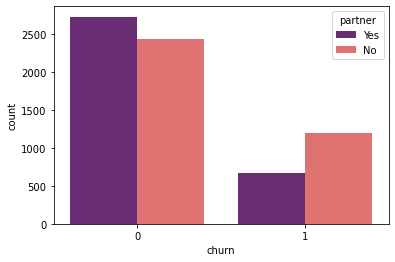

churn       0     1
partner            
No       2429  1188
Yes      2724   669
p=0.000000000000
Probably dependent


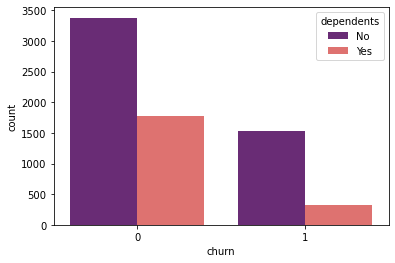

churn          0     1
dependents            
No          3380  1531
Yes         1773   326
p=0.000000000000
Probably dependent


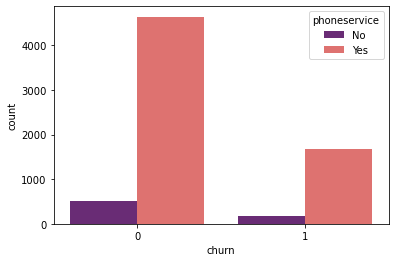

churn            0     1
phoneservice            
No             510   170
Yes           4643  1687
p=0.378155023895
Probably independent


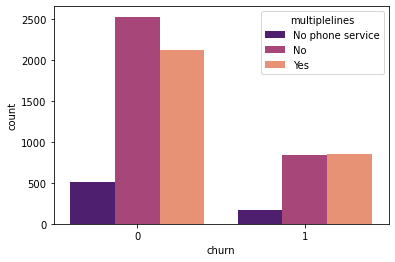

churn                0    1
multiplelines              
No                2526  837
No phone service   510  170
Yes               2117  850
p=0.002129979497
Probably dependent


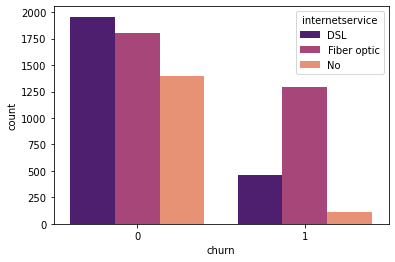

churn               0     1
internetservice            
DSL              1957   457
Fiber optic      1799  1291
No               1397   109
p=0.000000000000
Probably dependent


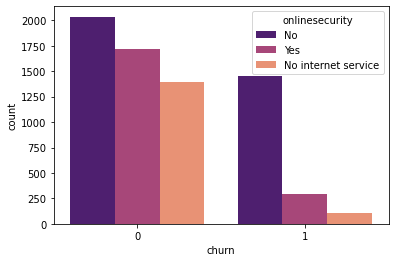

churn                   0     1
onlinesecurity                 
No                   2036  1453
No internet service  1397   109
Yes                  1720   295
p=0.000000000000
Probably dependent


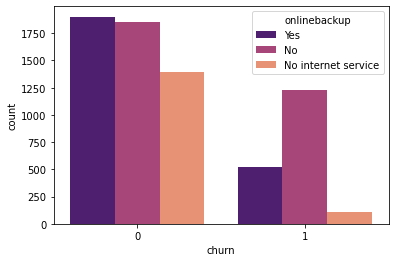

churn                   0     1
onlinebackup                   
No                   1854  1225
No internet service  1397   109
Yes                  1902   523
p=0.000000000000
Probably dependent


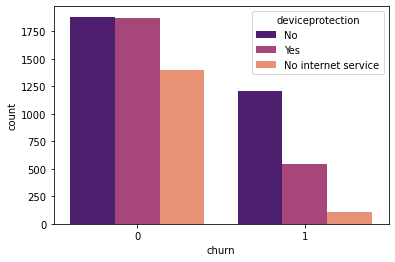

churn                   0     1
deviceprotection               
No                   1883  1203
No internet service  1397   109
Yes                  1873   545
p=0.000000000000
Probably dependent


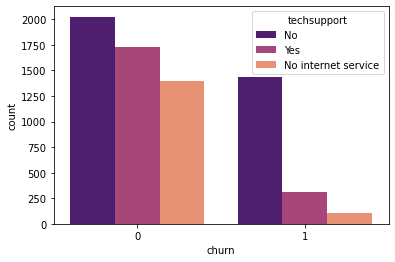

churn                   0     1
techsupport                    
No                   2026  1438
No internet service  1397   109
Yes                  1730   310
p=0.000000000000
Probably dependent


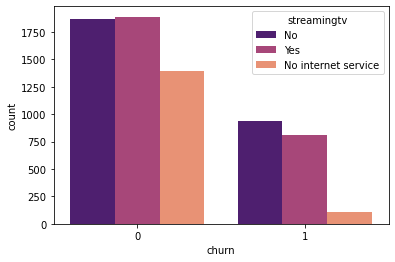

churn                   0    1
streamingtv                   
No                   1867  934
No internet service  1397  109
Yes                  1889  814
p=0.000000000000
Probably dependent


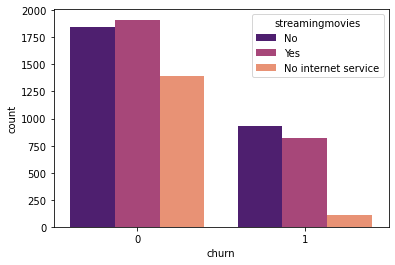

churn                   0    1
streamingmovies               
No                   1843  930
No internet service  1397  109
Yes                  1913  818
p=0.000000000000
Probably dependent


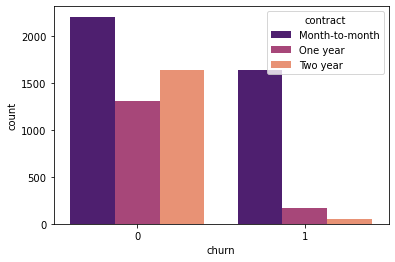

churn              0     1
contract                  
Month-to-month  2210  1643
One year        1306   166
Two year        1637    48
p=0.000000000000
Probably dependent


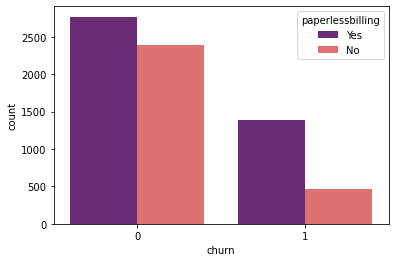

churn                0     1
paperlessbilling            
No                2386   466
Yes               2767  1391
p=0.000000000000
Probably dependent


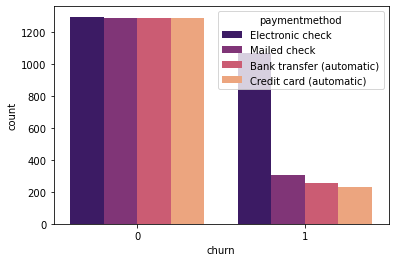

churn                         0     1
paymentmethod                        
Bank transfer (automatic)  1284   258
Credit card (automatic)    1289   232
Electronic check           1294  1065
Mailed check               1286   302
p=0.000000000000
Probably dependent


In [35]:
for cat in ['gender', 'seniorcitizen', 'partner', 'dependents',
       'phoneservice', 'multiplelines', 'internetservice', 'onlinesecurity',
       'onlinebackup', 'deviceprotection', 'techsupport', 'streamingtv',
       'streamingmovies', 'contract', 'paperlessbilling', 'paymentmethod']:
    sns.countplot(x='churn',data=data, hue=cat, palette='magma')
    plt.show()
    #creating a contingency table
    ct=pd.crosstab(data[cat],data['churn'])
    # checking the dependency
    stat, p, dof, expected = stats.chi2_contingency(ct)
    print(ct)
    print('p=%.12f' %(p))
    if p > 0.05:
        print('Probably independent')
    else:
        print('Probably dependent')

Dari perhitungan skor chi square di atas, berikut kolom-kolom yang dinilai memiliki hubungan dengan kolom target.

- `seniorcitizen`
- `partner`
- `dependents`
- `multiplelines`
- `internetservice`
- `onlinesecurity`
- `onlinebackup`
- `deviceprotection`
- `techsupport`
- `streamingtv`
- `streamingmovies`
- `contract`
- `paperlessbilling`
- `paymentmethod`

Hal ini akan kita tinjau kembali menggunakan phik matrix yang mampu menghitung korelasi data numerik sekaligus data kategori dengan basis chi square dan korelasi pearson

interval columns not set, guessing: ['tenure', 'monthlycharges', 'totalcharges', 'churn']


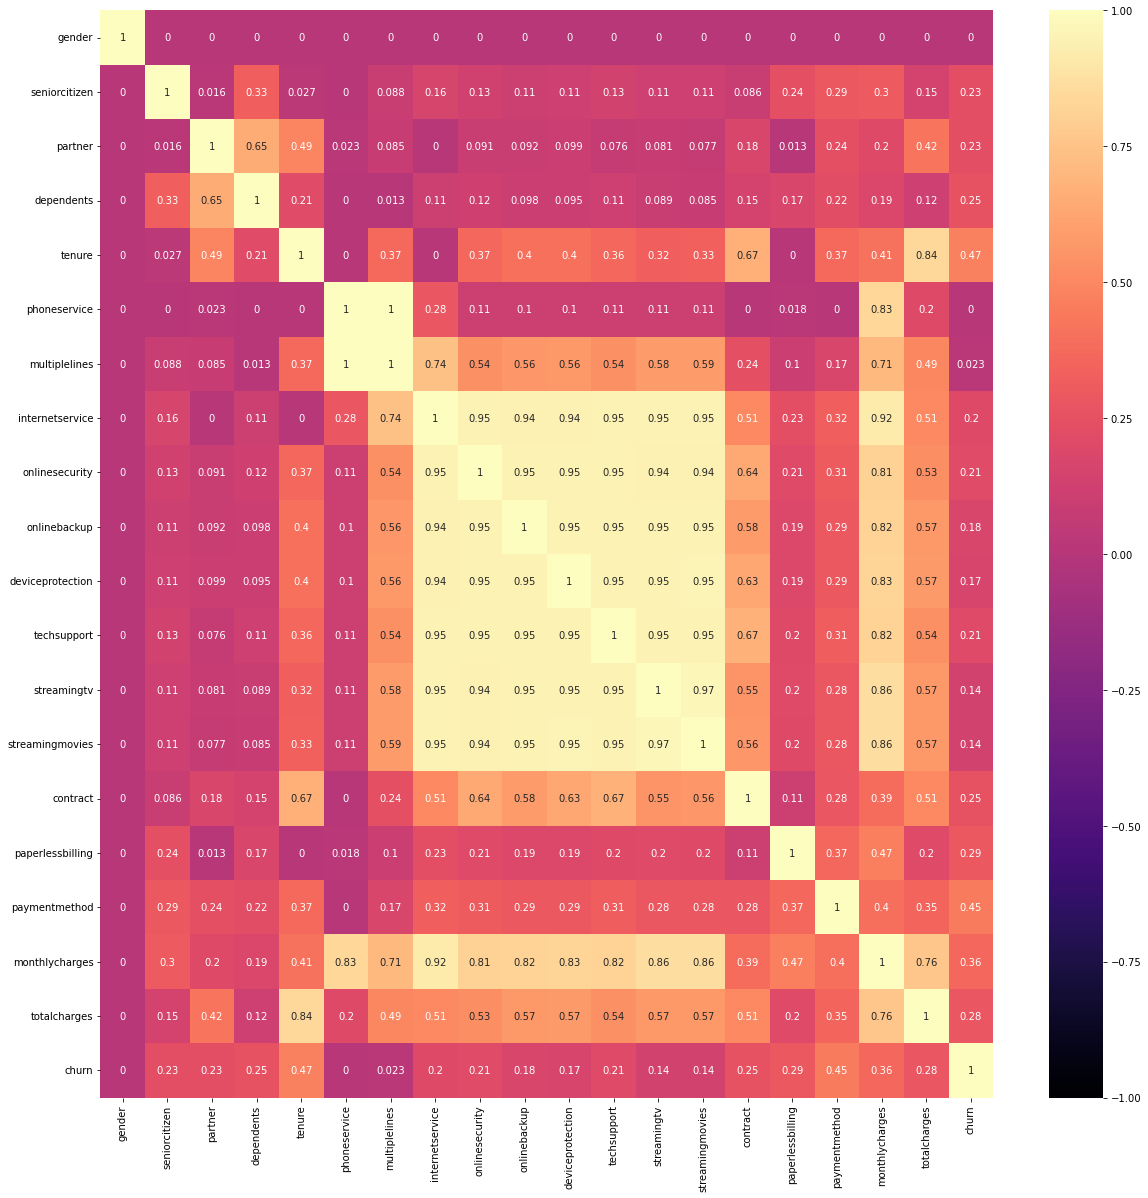

In [36]:
plt.figure(figsize=(20,20))
sns.heatmap(data.phik_matrix(), vmin=-1, vmax=1, annot=True, cmap='magma');

Dari segala uji statistik yang dilakukan berikut kolom-kolom yang akan dijadikan feature:

Data Kategori:
`seniorcitizen`, `partner`, `dependents`, `internetservice`, `onlinesecurity`, `onlinebackup`, `deviceprotection`, `techsupport`, `streamingtv`, `streamingmovies`, `contract`, `paperlessbilling`, `paymentmethod`

Data Numerik:
`tenure`,`monthlycharges`,`totalcharges`

Kolom yang di drop sebagai berikut

`gender`, `phoneservice`, `multiplelines`, `paymentmethod`

Kolom payment method seperti yang sudah penulis prediksi di atas memiliki skor korelasi yang tidak valid karena berhubungan dengan kolom `contract`

In [37]:
X_train.drop(columns=['gender', 'phoneservice', 'multiplelines','paymentmethod'], inplace=True)
X_test.drop(columns=['gender', 'phoneservice', 'multiplelines','paymentmethod'], inplace=True)
X_val.drop(columns=['gender', 'phoneservice', 'multiplelines','paymentmethod'], inplace=True)

In [38]:
# memisahkan kolom kategori dan numerik
cat_cols = ['seniorcitizen', 'partner', 'dependents', 'internetservice', 'onlinesecurity', 'onlinebackup', 'deviceprotection', 'techsupport', 'streamingtv', 'streamingmovies', 'contract', 'paperlessbilling']
num_cols = ['tenure','monthlycharges', 'totalcharges']

X_train_num = X_train[num_cols]
X_train_cat = X_train[cat_cols]

X_test_num = X_test[num_cols]
X_test_cat = X_test[cat_cols]

X_val_num = X_val[num_cols]
X_val_cat = X_val[cat_cols]

In [39]:
X_train_num

,tenure,monthlycharges,totalcharges
0,72,85.45,6227.50
1,17,76.45,1233.40
2,2,44.35,81.25
3,70,19.80,1378.75
4,70,39.15,2692.75
...,...,...,...
5042,30,84.30,2438.60
5043,39,59.80,2343.85
5044,42,95.25,3959.35
5045,1,18.85,18.85


## Preprocess Data Numerik
### Checking Outlier

<AxesSubplot:>

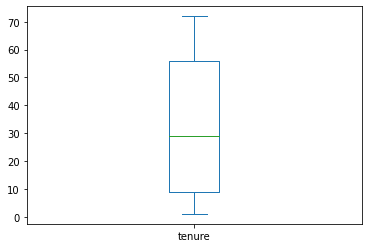

In [40]:
X_train_num['tenure'].plot(kind='box')

<AxesSubplot:>

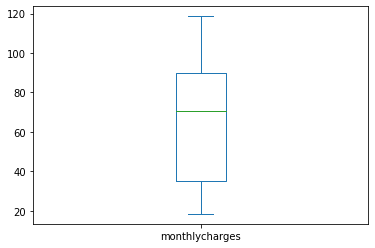

In [41]:
X_train_num['monthlycharges'].plot(kind='box')

<AxesSubplot:>

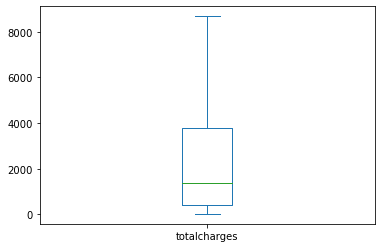

In [42]:
X_train_num['totalcharges'].plot(kind='box')

Dari visualisasi tersebut tidak terlihat adanya data outlier sehingga tidak dilakukan handling lebih jauh.

### Feature Scaling

Dilakukan untuk kolom/feature dengan tipe numerikal. Tujuannya untuk menyamakan/menyeragamkan range masing-masing featurenya, agar model lebih mudah dalam mempelajari pola/pattern dari feature ini. Karena distribusi data mayoritas normal sehingga scalling menggunakan Standard Scaler.

In [43]:
scaler = StandardScaler()
scaler.fit(X_train_num)

X_train_num_scaled = scaler.transform(X_train_num)
X_test_num_scaled = scaler.transform(X_test_num)
X_val_num_scaled = scaler.transform(X_val_num)

X_train_num_scaled

array([[ 1.60549966,  0.68699772,  1.72722314],
       [-0.63589198,  0.38941111, -0.46626167],
       [-1.2471806 , -0.67198114, -0.9723035 ],
       ...,
       [ 0.3829224 ,  1.01103648,  0.7310171 ],
       [-1.28793318, -1.51514321, -0.99971054],
       [-1.16567545, -1.15803927, -0.95594274]])

In [44]:
X_train_num_scaled_df = pd.DataFrame(X_train_num_scaled)
X_train_num_scaled_df

,0,1,2
0,1.605500,0.686998,1.727223
1,-0.635892,0.389411,-0.466262
2,-1.247181,-0.671981,-0.972304
3,1.523995,-1.483731,-0.402422
4,1.523995,-0.843920,0.174707
...,...,...,...
5042,-0.106108,0.648973,0.063081
5043,0.260665,-0.161124,0.021465
5044,0.382922,1.011036,0.731017
5045,-1.287933,-1.515143,-0.999711


In [45]:
X_test_num_scaled_df = pd.DataFrame(X_test_num_scaled)

In [46]:
X_val_num_scaled_df = pd.DataFrame(X_val_num_scaled)

### Feature Encoding

Dilakukan untuk kolom/feature dengan tipe kategorikal. Tujuannya untuk mengubah kolom kategorikal ini menjadi numeric karena model yang dibuat hanya bisa membaca data numerik.

In [215]:
X_train_cat.shape

(5047, 12)

In [47]:
# Feature Encoding using OneHotEncoder (nominal data) 

encoder = OneHotEncoder()
encoder.fit(X_train_cat)

X_train_cat_enc = encoder.transform(X_train_cat).toarray()
X_test_cat_enc = encoder.transform(X_test_cat).toarray()
X_val_cat_enc = encoder.transform(X_val_cat).toarray()

X_train_cat_enc

array([[1., 0., 0., ..., 1., 0., 1.],
       [0., 1., 0., ..., 0., 0., 1.],
       [1., 0., 1., ..., 0., 1., 0.],
       ...,
       [1., 0., 0., ..., 0., 0., 1.],
       [1., 0., 1., ..., 0., 0., 1.],
       [1., 0., 1., ..., 0., 0., 1.]])

In [48]:
X_train_cat_enc_df = pd.DataFrame(X_train_cat_enc)
X_train_cat_enc_df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31
0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
1,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
4,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5042,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
5043,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
5044,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
5045,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0


In [49]:
X_test_cat_enc_df = pd.DataFrame(X_test_cat_enc)

In [50]:
X_val_cat_enc_df = pd.DataFrame(X_val_cat_enc)

### Concate X_train_final

In [51]:
X_train_final = pd.concat([X_train_num_scaled_df,X_train_cat_enc_df],axis=1)
X_train_final

,0,1,2,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31
0,1.605500,0.686998,1.727223,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
1,-0.635892,0.389411,-0.466262,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2,-1.247181,-0.671981,-0.972304,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,1.523995,-1.483731,-0.402422,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
4,1.523995,-0.843920,0.174707,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5042,-0.106108,0.648973,0.063081,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
5043,0.260665,-0.161124,0.021465,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
5044,0.382922,1.011036,0.731017,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
5045,-1.287933,-1.515143,-0.999711,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0


### Concate X_test_final

In [52]:
X_test_final = pd.concat([X_test_num_scaled_df,X_test_cat_enc_df],axis=1)
X_test_final

,0,1,2,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31
0,0.219912,0.620867,0.374286,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
1,0.016149,-1.483731,-0.726299,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
2,0.342170,-1.493651,-0.657408,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
3,-1.165675,-0.506655,-0.911516,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,-1.165675,-0.303304,-0.908134,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
696,-0.921160,-1.162999,-0.895880,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
697,-1.287933,0.855630,-0.968219,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
698,-0.839655,-0.637263,-0.780081,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
699,0.994211,0.655586,1.120184,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0


### Concate X_val_final

In [53]:
X_val_final = pd.concat([X_val_num_scaled_df,X_val_cat_enc_df],axis=1)
X_val_final

,0,1,2,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31
0,-0.961913,-1.490344,-0.921289,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
1,-0.921160,0.186060,-0.711014,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
2,-1.247181,0.473727,-0.944896,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,1.238726,1.156523,1.763985,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
4,0.627438,0.495220,0.691905,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1257,1.523995,0.362959,1.368780,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
1258,0.790448,0.052146,0.454641,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
1259,-0.717397,-1.267154,-0.841703,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
1260,-0.065356,0.376185,-0.029506,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


In [54]:
X_train_final.shape

(5047, 35)

### Handling Imbalance

In [55]:
smnc = SMOTENC(sampling_strategy='auto',random_state=121,categorical_features=[3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34])

In [56]:
X_train_smnc, y_train_smnc = smnc.fit_resample(X_train_final, y_train)

In [57]:
counter = Counter(y_train_smnc)
print(counter)

Counter({0: 3710, 1: 3710})


In [58]:
X_train_smnc.shape

(7420, 35)

# TensorFlow Pipeline 

In [59]:
# tensorFlow pipeline

train_dataset = tf.data.Dataset.from_tensor_slices((X_train_smnc, y_train_smnc))
train_dataset = train_dataset.shuffle(buffer_size = 7000).batch(64)

test_dataset = tf.data.Dataset.from_tensor_slices((X_test_final, y_test))
test_dataset = test_dataset.batch(64)

val_dataset = tf.data.Dataset.from_tensor_slices((X_val_final, y_val))
val_dataset = val_dataset.batch(64)

# Model Architechture
### Model Sequential

In [60]:
# menentukan jumlah neuron
alp = 20
inp = X_train_smnc.shape[1]
out = 1
hid = int(len(X_train_smnc)/(alp*(inp+out)))
print(f'Jumlah neuron pada hidden layer: {hid}')

Jumlah neuron pada hidden layer: 10


In [61]:
model_seq = tf.keras.models.Sequential()
model_seq.add(tf.keras.layers.Dense(inp, activation='relu', input_shape=(X_train_smnc.shape[1],))) #input layer
model_seq.add(tf.keras.layers.Dense(hid, activation='relu')) #hidden layer
model_seq.add(tf.keras.layers.Dense(out, activation='sigmoid')) #output layer

model_seq.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 35)                1260      
                                                                 
 dense_1 (Dense)             (None, 10)                360       
                                                                 
 dense_2 (Dense)             (None, 1)                 11        
                                                                 
Total params: 1,631
Trainable params: 1,631
Non-trainable params: 0
_________________________________________________________________


In [62]:
model_seq.compile(loss='binary_crossentropy',optimizer='adam',metrics='accuracy')

In [63]:
history1 = model_seq.fit(train_dataset, epochs=50, batch_size=32, validation_data=(val_dataset))

Epoch 1/50
116/116 [==============================] - 1s 6ms/step - loss: 0.5524 - accuracy: 0.7171 - val_loss: 0.5002 - val_accuracy: 0.7441
Epoch 2/50
116/116 [==============================] - 0s 3ms/step - loss: 0.4673 - accuracy: 0.7787 - val_loss: 0.5428 - val_accuracy: 0.7219
Epoch 3/50
116/116 [==============================] - 0s 3ms/step - loss: 0.4591 - accuracy: 0.7823 - val_loss: 0.5353 - val_accuracy: 0.7258
Epoch 4/50
116/116 [==============================] - 0s 3ms/step - loss: 0.4529 - accuracy: 0.7861 - val_loss: 0.5297 - val_accuracy: 0.7306
Epoch 5/50
116/116 [==============================] - 0s 3ms/step - loss: 0.4504 - accuracy: 0.7879 - val_loss: 0.5076 - val_accuracy: 0.7377
Epoch 6/50
116/116 [==============================] - 0s 3ms/step - loss: 0.4469 - accuracy: 0.7887 - val_loss: 0.5165 - val_accuracy: 0.7258
Epoch 7/50
116/116 [==============================] - 0s 3ms/step - loss: 0.4449 - accuracy: 0.7884 - val_loss: 0.4978 - val_accuracy: 0.7441
Epoch 

Text(0.5, 0, 'Epoch')

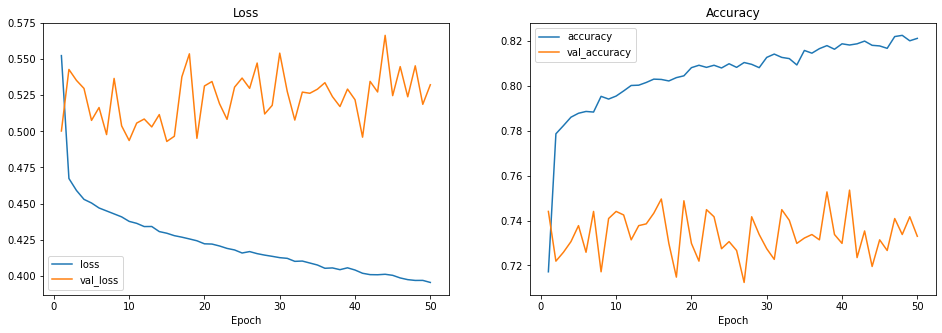

In [64]:
epoch=50

fig, ax = plt.subplots(ncols=2,figsize=(16,5))
ax[0].plot(range(1,epoch+1),history1.history['loss'],label='loss')
ax[0].plot(range(1,epoch+1),history1.history['val_loss'],label='val_loss')
ax[0].set_title('Loss')
ax[0].legend()
ax[0].set_xlabel('Epoch')

ax[1].plot(range(1,epoch+1),history1.history['accuracy'],label='accuracy')
ax[1].plot(range(1,epoch+1),history1.history['val_accuracy'],label='val_accuracy')
ax[1].set_title('Accuracy')
ax[1].legend()
ax[1].set_xlabel('Epoch')

Dari visualisasi skor loss dan accuracy dari model ANN sequential terlihat bahwa terjadi exploding gradient yang cukup parah. Hal ini menjadikan model tidak akan bisa stabil dalam memprediksi data sehingga dibutuhkan improvement lebih lanjut seperti penambahan hidden layer, kernel initializer, optimizer dsb. 

### Sequential Evaluation (Base)

In [65]:
# mencari probabilita
y_test_prob = model_seq.predict(test_dataset)
# membulatkan hasil predict
y_test_pred = np.round(y_test_prob)

11/11 [==============================] - 0s 6ms/step


========== TEST ==========
              precision    recall  f1-score   support

           0       0.88      0.70      0.78       515
           1       0.46      0.73      0.57       186

    accuracy                           0.70       701
   macro avg       0.67      0.71      0.67       701
weighted avg       0.77      0.70      0.72       701



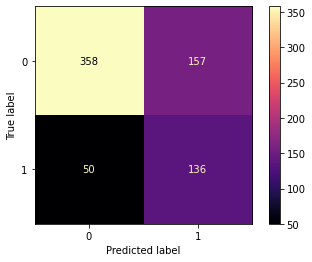

In [66]:
# classification report
print("="*10,"TEST","="*10)
print(classification_report(y_test, y_test_pred, zero_division=0))

# confusion matrix
cm = confusion_matrix(y_test, y_test_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='magma')
plt.show()

Dari classification report tersebut terlihat skor recall model sequential (base) adalah 0.7. Bisa dibilang skor ini masi bisa ditingkatkan lebih jauh. Walaupun begitu ditambah dengan grafik akurasi di atas menjadikan model ini tidak reliable.

### Model Functional

In [67]:
input_lyr = tf.keras.layers.Input(shape=(X_train_smnc.shape[1],))
layers = tf.keras.layers.Dense(inp, activation='relu')(input_lyr)
layers = tf.keras.layers.Dense(hid, activation='relu')(layers)
output = tf.keras.layers.Dense(out, activation='sigmoid')(layers)

model_func = tf.keras.models.Model(inputs=input_lyr,outputs=output)

In [68]:
model_func.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 35)]              0         
                                                                 
 dense_3 (Dense)             (None, 35)                1260      
                                                                 
 dense_4 (Dense)             (None, 10)                360       
                                                                 
 dense_5 (Dense)             (None, 1)                 11        
                                                                 
Total params: 1,631
Trainable params: 1,631
Non-trainable params: 0
_________________________________________________________________


In [69]:
model_func.compile(loss='binary_crossentropy',optimizer='adam',metrics='accuracy')

In [70]:
history2 = model_func.fit(train_dataset, epochs=50, batch_size=32, validation_data=(val_dataset))

Epoch 1/50
116/116 [==============================] - 2s 5ms/step - loss: 0.5452 - accuracy: 0.7206 - val_loss: 0.5190 - val_accuracy: 0.7417
Epoch 2/50
116/116 [==============================] - 0s 3ms/step - loss: 0.4671 - accuracy: 0.7745 - val_loss: 0.5363 - val_accuracy: 0.7298
Epoch 3/50
116/116 [==============================] - 0s 3ms/step - loss: 0.4567 - accuracy: 0.7819 - val_loss: 0.4991 - val_accuracy: 0.7409
Epoch 4/50
116/116 [==============================] - 0s 3ms/step - loss: 0.4524 - accuracy: 0.7818 - val_loss: 0.5133 - val_accuracy: 0.7393
Epoch 5/50
116/116 [==============================] - 0s 3ms/step - loss: 0.4489 - accuracy: 0.7852 - val_loss: 0.5175 - val_accuracy: 0.7338
Epoch 6/50
116/116 [==============================] - 0s 3ms/step - loss: 0.4470 - accuracy: 0.7849 - val_loss: 0.5063 - val_accuracy: 0.7338
Epoch 7/50
116/116 [==============================] - 0s 3ms/step - loss: 0.4447 - accuracy: 0.7896 - val_loss: 0.5077 - val_accuracy: 0.7377
Epoch 

Text(0.5, 0, 'Epoch')

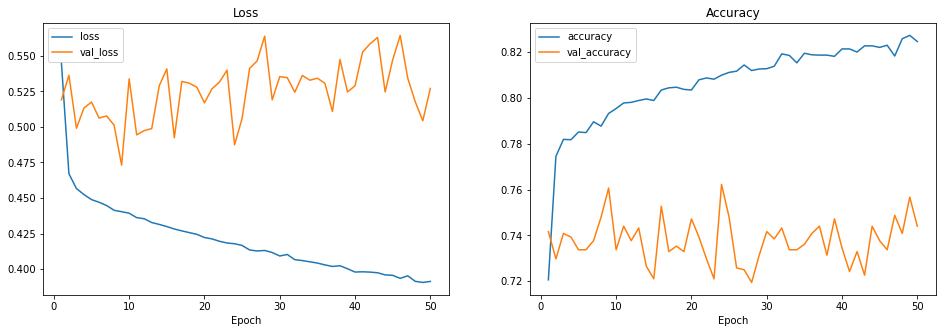

In [71]:
epoch=50

fig, ax = plt.subplots(ncols=2,figsize=(16,5))
ax[0].plot(range(1,epoch+1),history2.history['loss'],label='loss')
ax[0].plot(range(1,epoch+1),history2.history['val_loss'],label='val_loss')
ax[0].set_title('Loss')
ax[0].legend()
ax[0].set_xlabel('Epoch')

ax[1].plot(range(1,epoch+1),history2.history['accuracy'],label='accuracy')
ax[1].plot(range(1,epoch+1),history2.history['val_accuracy'],label='val_accuracy')
ax[1].set_title('Accuracy')
ax[1].legend()
ax[1].set_xlabel('Epoch')

Hal yang sama bisa kita amati juga dari model functional. Grafiknya juga menunjukan exploding gradient. Sehingga harus kita optimasisasi sama halnya dengan model sequential. 

### Functional Evaluation (Base)

In [72]:
# mencari probabilita
y_test_prob = model_func.predict(test_dataset)
# membulatkan hasil predict
y_test_pred = np.round(y_test_prob)

11/11 [==============================] - 0s 2ms/step


========== TEST ==========
              precision    recall  f1-score   support

           0       0.87      0.74      0.80       515
           1       0.48      0.69      0.57       186

    accuracy                           0.72       701
   macro avg       0.68      0.71      0.68       701
weighted avg       0.77      0.72      0.74       701



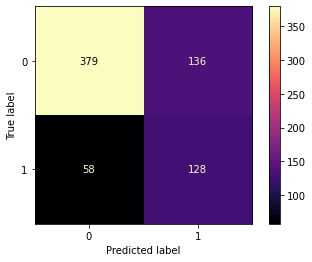

In [73]:
# classification report
print("="*10,"TEST","="*10)
print(classification_report(y_test, y_test_pred, zero_division=0))

# confusion matrix
cm = confusion_matrix(y_test, y_test_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='magma')
plt.show()

# Model Imporvement

### Model Sequential

In [178]:
model_seqim = tf.keras.models.Sequential()
model_seqim.add(tf.keras.layers.Dense(inp, activation='elu', input_shape=(X_train_smnc.shape[1],), kernel_initializer='HeNormal',kernel_regularizer='l2')) #input layer
model_seqim.add(tf.keras.layers.BatchNormalization())
model_seqim.add(tf.keras.layers.Dense(25, activation='elu')) #hidden layer
model_seqim.add(tf.keras.layers.BatchNormalization())
model_seqim.add(tf.keras.layers.Dense(15, activation='elu'))
model_seqim.add(tf.keras.layers.Dropout(0.1))
model_seqim.add(tf.keras.layers.Dense(out, activation='sigmoid')) #output layer

model_seqim.summary()

Model: "sequential_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_75 (Dense)            (None, 35)                1260      
                                                                 
 batch_normalization_36 (Bat  (None, 35)               140       
 chNormalization)                                                
                                                                 
 dense_76 (Dense)            (None, 25)                900       
                                                                 
 batch_normalization_37 (Bat  (None, 25)               100       
 chNormalization)                                                
                                                                 
 dense_77 (Dense)            (None, 15)                390       
                                                                 
 dropout_12 (Dropout)        (None, 15)              

In [179]:
model_seqim.compile(loss='binary_crossentropy',optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),metrics='accuracy')

In [180]:
history3 = model_seqim.fit(train_dataset, epochs=50, batch_size=32, validation_data=(val_dataset))

Epoch 1/50
116/116 [==============================] - 2s 6ms/step - loss: 1.5860 - accuracy: 0.5074 - val_loss: 1.4168 - val_accuracy: 0.5650
Epoch 2/50
116/116 [==============================] - 0s 4ms/step - loss: 1.3251 - accuracy: 0.6580 - val_loss: 1.3233 - val_accuracy: 0.6197
Epoch 3/50
116/116 [==============================] - 0s 4ms/step - loss: 1.2161 - accuracy: 0.7194 - val_loss: 1.2474 - val_accuracy: 0.6743
Epoch 4/50
116/116 [==============================] - 0s 4ms/step - loss: 1.1561 - accuracy: 0.7482 - val_loss: 1.1891 - val_accuracy: 0.7044
Epoch 5/50
116/116 [==============================] - 0s 4ms/step - loss: 1.1105 - accuracy: 0.7571 - val_loss: 1.1494 - val_accuracy: 0.7155
Epoch 6/50
116/116 [==============================] - 0s 4ms/step - loss: 1.0727 - accuracy: 0.7648 - val_loss: 1.1117 - val_accuracy: 0.7155
Epoch 7/50
116/116 [==============================] - 0s 4ms/step - loss: 1.0403 - accuracy: 0.7683 - val_loss: 1.0806 - val_accuracy: 0.7163
Epoch 

Text(0.5, 0, 'Epoch')

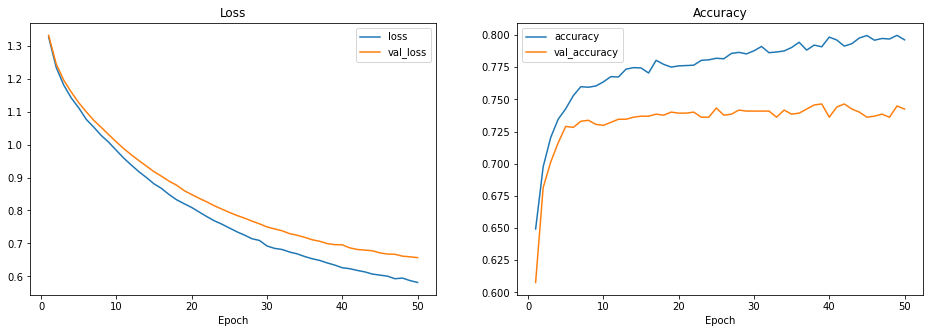

In [175]:
epoch=50

fig, ax = plt.subplots(ncols=2,figsize=(16,5))
ax[0].plot(range(1,epoch+1),history3.history['loss'],label='loss')
ax[0].plot(range(1,epoch+1),history3.history['val_loss'],label='val_loss')
ax[0].set_title('Loss')
ax[0].legend()
ax[0].set_xlabel('Epoch')


ax[1].plot(range(1,epoch+1),history3.history['accuracy'],label='accuracy')
ax[1].plot(range(1,epoch+1),history3.history['val_accuracy'],label='val_accuracy')
ax[1].set_title('Accuracy')
ax[1].legend()
ax[1].set_xlabel('Epoch')

Dari grafik di atas terlihat setelah melakukan improvement, gradientnya sudah tidak exploding. Namun dilihat dari jaraknya model ini nampaknya masih overfit.

### Sequential Evaluation (Improved)

In [176]:
# mencari probabilita
y_test_prob_seqim = model_seqim.predict(test_dataset)
# membulatkan hasil predict
y_test_pred_seqim = np.round(y_test_prob_seqim)

11/11 [==============================] - 0s 2ms/step


========== TEST ==========
              precision    recall  f1-score   support

           0       0.89      0.70      0.78       515
           1       0.48      0.75      0.58       186

    accuracy                           0.71       701
   macro avg       0.68      0.73      0.68       701
weighted avg       0.78      0.71      0.73       701



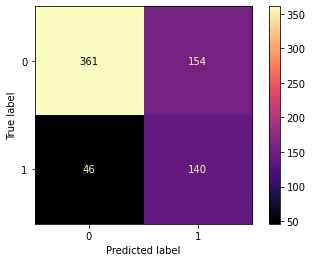

In [177]:
# classification report
print("="*10,"TEST","="*10)
print(classification_report(y_test, y_test_pred_seqim, zero_division=0))

# confusion matrix
cm = confusion_matrix(y_test, y_test_pred_seqim)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='magma')
plt.show()

Terdapat peningkatan skor recall

In [141]:
# model freeze
model_seqim.trainable = False

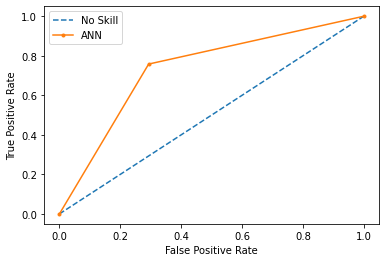

AUC score: 0.7324303163169433


In [142]:
# calculate roc curves & auc
fpr, tpr, thresholds = roc_curve(y_test, y_test_pred_seqim)
auc = roc_auc_score(y_test, y_test_pred_seqim)

# plot the roc curve for the model
plt.plot([0,1], [0,1], linestyle='--', label='No Skill')
plt.plot(fpr, tpr, marker='.', label='ANN')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()
print(f'AUC score: {auc}')

## Model Functional

In [204]:
input_lyr = tf.keras.layers.Input(shape=(X_train_smnc.shape[1],))
layers = tf.keras.layers.Dense(9, activation='relu',kernel_initializer='HeNormal',kernel_regularizer='l2')(input_lyr)
layers = tf.keras.layers.BatchNormalization()(layers)
layers = tf.keras.layers.Dense(3, activation='relu')(layers)
layers = tf.keras.layers.BatchNormalization()(layers)
layers = tf.keras.layers.Dropout(0.1)(layers)
output = tf.keras.layers.Dense(out, activation='sigmoid')(layers)

model_funcim = tf.keras.models.Model(inputs=input_lyr,outputs=output)

In [205]:
model_funcim.compile(loss='binary_crossentropy',optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),metrics='accuracy')

In [206]:
history4 = model_funcim.fit(train_dataset, epochs=50, batch_size=32, validation_data=(val_dataset))

Epoch 1/50
116/116 [==============================] - 3s 6ms/step - loss: 0.9668 - accuracy: 0.4873 - val_loss: 0.8606 - val_accuracy: 0.5309
Epoch 2/50
116/116 [==============================] - 0s 4ms/step - loss: 0.9016 - accuracy: 0.5431 - val_loss: 0.8250 - val_accuracy: 0.6212
Epoch 3/50
116/116 [==============================] - 0s 4ms/step - loss: 0.8578 - accuracy: 0.5826 - val_loss: 0.8086 - val_accuracy: 0.6490
Epoch 4/50
116/116 [==============================] - 0s 4ms/step - loss: 0.8291 - accuracy: 0.6152 - val_loss: 0.7973 - val_accuracy: 0.6688
Epoch 5/50
116/116 [==============================] - 0s 4ms/step - loss: 0.7975 - accuracy: 0.6376 - val_loss: 0.7845 - val_accuracy: 0.6894
Epoch 6/50
116/116 [==============================] - 0s 4ms/step - loss: 0.7748 - accuracy: 0.6611 - val_loss: 0.7703 - val_accuracy: 0.6981
Epoch 7/50
116/116 [==============================] - 0s 4ms/step - loss: 0.7528 - accuracy: 0.6805 - val_loss: 0.7555 - val_accuracy: 0.7068
Epoch 

Text(0.5, 0, 'Epoch')

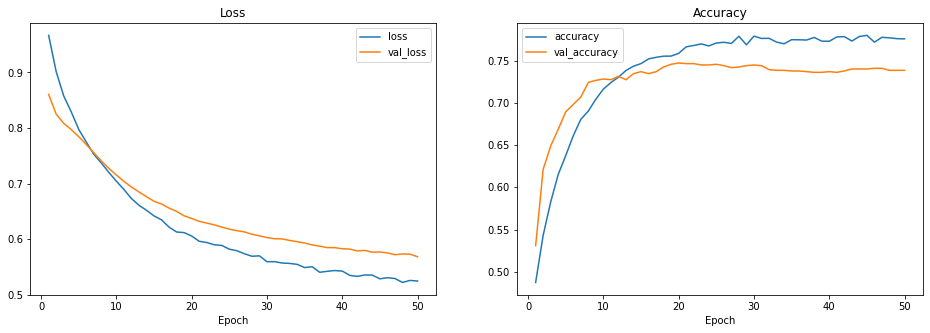

In [207]:
epoch=50

fig, ax = plt.subplots(ncols=2,figsize=(16,5))
ax[0].plot(range(1,epoch+1),history4.history['loss'],label='loss')
ax[0].plot(range(1,epoch+1),history4.history['val_loss'],label='val_loss')
ax[0].set_title('Loss')
ax[0].legend()
ax[0].set_xlabel('Epoch')


ax[1].plot(range(1,epoch+1),history4.history['accuracy'],label='accuracy')
ax[1].plot(range(1,epoch+1),history4.history['val_accuracy'],label='val_accuracy')
ax[1].set_title('Accuracy')
ax[1].legend()
ax[1].set_xlabel('Epoch')

Dari grafik ini dapat kita lihat pada epoch sekitar 10 model tampak just fit dengan garis gradient yang stabil sehingga model functional yang sudah dimprove ini akan dipilih menjadi model terbaik untuk memprediksi customer churn.

### Functional Evaluation (Improved)

In [208]:
# mencari probabilita
y_test_prob_funcim = model_funcim.predict(test_dataset)
# membulatkan hasil predict
y_test_pred_funcim = np.round(y_test_prob_funcim)

11/11 [==============================] - 0s 2ms/step


========== TEST ==========
              precision    recall  f1-score   support

           0       0.89      0.71      0.79       515
           1       0.49      0.76      0.60       186

    accuracy                           0.73       701
   macro avg       0.69      0.74      0.69       701
weighted avg       0.79      0.73      0.74       701



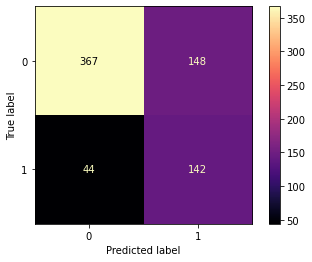

In [209]:
# classification report
print("="*10,"TEST","="*10)
print(classification_report(y_test, y_test_pred_funcim, zero_division=0))

# confusion matrix
cm = confusion_matrix(y_test, y_test_pred_funcim)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='magma')
plt.show()

In [88]:
# model freeze
model_funcim.trainable = False

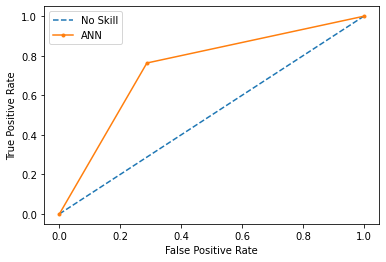

AUC score: 0.7380311097191774


In [210]:
# calculate roc curves & auc
fpr, tpr, thresholds = roc_curve(y_test, y_test_pred_funcim)
auc = roc_auc_score(y_test, y_test_pred_funcim)

# plot the roc curve for the model
plt.plot([0,1], [0,1], linestyle='--', label='No Skill')
plt.plot(fpr, tpr, marker='.', label='ANN')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()
print(f'AUC score: {auc}')

# Model Saving

In [211]:
model_funcim.save('customer_churn_model')

INFO:tensorflow:Assets written to: customer_churn_model\assets


In [213]:
model_funcim.save('customer_churn_model.h5')

# Model Inference

In [194]:
data_inf.reset_index(drop=True)

,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
0,Male,No,No,Yes,35,Yes,No,DSL,No,No,No,Yes,Yes,Yes,One year,Yes,Mailed check,72.10,2495.15,0
1,Male,No,Yes,No,8,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,20.25,158.35,0
2,Female,No,Yes,Yes,67,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6717.90,0
3,Male,No,No,No,26,No,No phone service,DSL,Yes,No,No,Yes,Yes,Yes,One year,No,Credit card (automatic),54.55,1362.85,0
4,Male,No,No,Yes,1,Yes,Yes,Fiber optic,No,No,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,93.30,93.30,1


In [216]:
num_cols

['tenure', 'monthlycharges', 'totalcharges']

In [217]:
cat_cols

['seniorcitizen',
 'partner',
 'dependents',
 'internetservice',
 'onlinesecurity',
 'onlinebackup',
 'deviceprotection',
 'techsupport',
 'streamingtv',
 'streamingmovies',
 'contract',
 'paperlessbilling']

In [199]:
num_col = X_train_num.columns.values
cat_col = X_train_cat.columns.values

num_pipe = Pipeline([
    ('scaling', scaler)
])

cat_pipe = Pipeline([
    ('encoding', encoder)
])


preprocess = ColumnTransformer(transformers=[
    ('num', num_pipe, num_col),
    ('cat', cat_pipe, cat_col)
])

preprocess.fit(X_train)

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('scaling',
                                                  StandardScaler())]),
                                 array(['tenure', 'monthlycharges', 'totalcharges'], dtype=object)),
                                ('cat',
                                 Pipeline(steps=[('encoding',
                                                  OneHotEncoder())]),
                                 array(['seniorcitizen', 'partner', 'dependents', 'internetservice',
       'onlinesecurity', 'onlinebackup', 'deviceprotection',
       'techsupport', 'streamingtv', 'streamingmovies', 'contract',
       'paperlessbilling'], dtype=object))])

In [201]:
# save pipeline preprocess
pickle.dump(preprocess, open('preprocess.pkl', 'wb'))

In [202]:
data_inf_final = preprocess.transform(data_inf)

In [203]:
pred_inf = model_funcim.predict(data_inf_final)
pred_inf_df = pd.DataFrame(np.round_(pred_inf), columns=['Predicted Churn'])
pred_inf_df

1/1 [==============================] - 0s 134ms/step


,Predicted Churn
0,0.0
1,0.0
2,0.0
3,0.0
4,1.0


# Conclusion

Telah berhasil dibuat dua buah model ANN yaitu Sequential dan Functional yang bertujuan untuk membantu perusahaan melakukan prediksi customer mana yang akan melakukan churn. Penulis menggunakan tiga buah metric evaluasi untuk acuan performa model yang dibuat, yaitu Accuracy, Recall label 1, dan AUC Score. Nilai accuracy dan AUC score disini sebagai gambaran umum performa model dalam melakukan prediksi, dan nilai recall label 1 sebagai acuan error false negative yang didapatkan, false negative disini adalah model salah memprediksi customer churn dianggap sebagai customer tidak churn. Kesalahan dalam prediksi tersebut akan merugikan perusahaan karena perusahaan akan kehilangan customer begitu saja tanpa sempat melakukan usaha untuk me-retain customer tersebut, terlebih seperti yang diketahui bahwa cost untuk akuisisi customer baru jauh lebih tinggi daripada cost untuk me-retain customer yang sudah ada. Jadi disini penulis ingin meminimalisir kesalahan false negative ini.

Dan berikut adalah metric evaluasi dari kedua model yang sudah dibuat:

| Model             | Accuracy  | Recall 1  | AUC Score |
|  :---             |  :----:   |    :----: |   :----:  |
| ANN Sequential    | 0.71      | 0.75      | 0.73      |
| ANN Functional    | 0.73      | 0.76      | 0.74      |

Berdasarkan metric evaluasinya, model terbaik dalam prediksi customer churn kali ini adalah model ANN Functional melihat dari nilai accuracy dan AUC score yang lebih besar dibandingkan ANN Sequential. Secara umum performa model sudah cukup baik berdasarkan nilai accuracy dan AUC score-nya dan juga terlihat cukup stabil jika ditinjau dari grafik gradientnya. Dan kesalahan false negative berhasil diminimalisir karena nilai recall dari base model yang bernilai 0.69 menjadi 0.76 setelah dilakukan optimasi.